<a href="https://colab.research.google.com/github/ZubairHasan97/Comp_Bio/blob/main/p1_1_Gene_Network_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Deterministic Modelling  of Gene Network**

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

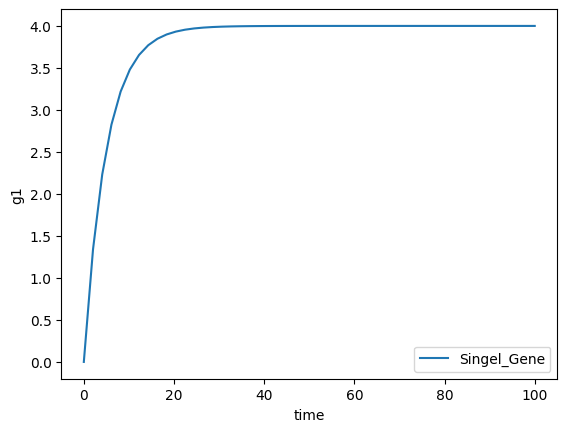

In [2]:
#testing a model_of_single_gene_expression level using ode system
y0 = 0
t = np.linspace(0,100, num=50)
k_1 = 0.80
gam_1 = 0.20
params = [k_1, gam_1]

def sim(init_var, timepoints, params):
  dg1dt = params[0] - params[1] * init_var
  return dg1dt

y = odeint(sim, y0, t, args=(params,))

# print(y)

f, ax = plt.subplots()
ax.plot(t, y, label="Singel_Gene")
ax.set_xlabel("time")
ax.set_ylabel("g1")

plt.legend()
plt.show()

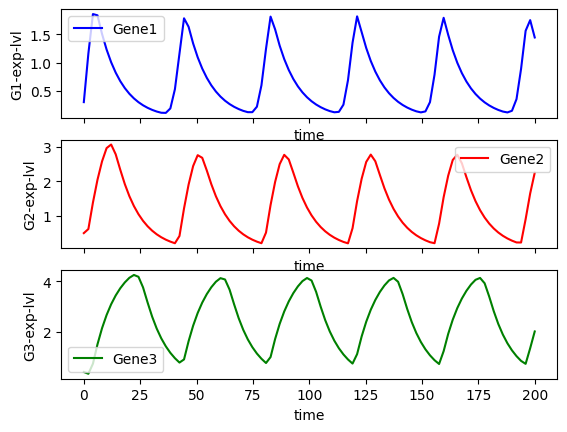

In [3]:
#Modelling 3-gene Oscillatory_Network: w/Negative Feedback loop in the network

y0 = [0.3,0.5,.4]
t = np.linspace(0,200, num=100)
k_1 = 0.50
gam_1 = 0.10
k_2 = 0.50
gam_2 = 0.10
k_3 = 0.50
gam_3 = 0.10
n = 9
c = 1
param = [k_1, gam_1, k_2, gam_2, k_3, gam_3, n, c]

def sim3gene(init_var, timepoints, params):
  g1 = init_var[0]
  g2 = init_var[1]
  g3 = init_var[2]

  #params
  k1 = params[0]
  gam1 = params[1]
  k2 = params[2]
  gam2 = params[3]
  k3 = params[4]
  gam3 = params[5]
  n = params[6]
  c = params[7]

  #ode equations for g1,g2,g3
  dg1dt = ((c**n / (c**n + g3**n)) * k1) - (gam1 * g1) # gene1 repressed by the expression of gene3 -> negative feedback response
  dg2dt = ((g1**n / (c**n + g1**n)) * k2) - (gam2 * g2) # gene2 gets activated by the expression of gene1 -> activation hill response
  dg3dt = ((g2**n / (c**n + g2**n)) * k3) - (gam3 * g3) # gene3 gets activated by the expression of gene2 -> activation hill response

  return dg1dt,dg2dt,dg3dt

#calling ode solver function
y = odeint(sim3gene, y0, t, args=(param,))

#printing out the defferential results of 3 ode
# print(y)

f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=False)

ax1.plot(t, y[:,0], label="Gene1", color="b")
ax2.plot(t, y[:,1], label="Gene2", color="r")
ax3.plot(t, y[:,2], label="Gene3", color="g")

ax1.set_xlabel("time")
ax1.set_ylabel("G1-exp-lvl")

ax2.set_xlabel("time")
ax2.set_ylabel("G2-exp-lvl")

ax3.set_xlabel("time")
ax3.set_ylabel("G3-exp-lvl")

ax1.legend()
ax2.legend()
ax3.legend()

plt.show()